## An Analysis of Mental Health in the Tech Workspace

The objective of this data analysis is to raise public awareness surrounding mental health illness within the workplace,  which reduces the issues associated with mental diseases.  In this study, our aim is to delve into the root causes of mental health disorders among employees by conducting an analysis of the Open Sourcing Mental Illness (OSMI) (osmihelp.org)  Mental Health in Tech Survey 2014 dataset.

Open Sourcing Mental Illness is a non-profit, corporation dedicated to raising awareness, educating, and providing resources to support mental wellness in the tech and open source communities. OSMI began in 2013, with Ed Finkler speaking at tech conferences about his personal experiences as a web developer and open source advocate with a mental health disorder. The response was overwhelming, and thus OSMI was born.

This anlysis will adopt an Exploratory Data Analysis Approach.
  Exploratory Data Analysis (EDA) is a process of describing the data by means of statistical and visualization techniques in     order to bring important aspects of that data into focus for further analysis. This involves inspecting the dataset from many   angles, describing & summarizing it without making any assumptions about its contents.

# Import libraries

In [72]:
import warnings 
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
%matplotlib inline

# Load the dataset into pandas Dataframe

In [73]:
df = pd.read_csv("Mental Health in Tech Survey (Responses) - Form Responses 1.csv")

In [74]:
df.head()

,Timestamp,Age,Gender,Country,"If you live in the United States, which state or territory do you live in?",Are you self-employed?,Do you have a family history of mental illness?,Have you sought treatment for a mental health condition?,"If you have a mental health condition, do you feel that it interferes with your work?",How many employees does your company or organization have?,...,How easy is it for you to take medical leave for a mental health condition?,Do you think that discussing a mental health issue with your employer would have negative consequences?,Do you think that discussing a physical health issue with your employer would have negative consequences?,Would you be willing to discuss a mental health issue with your coworkers?,Would you be willing to discuss a mental health issue with your direct supervisor(s)?,Would you bring up a mental health issue with a potential employer in an interview?,Would you bring up a physical health issue with a potential employer in an interview?,Do you feel that your employer takes mental health as seriously as physical health?,Have you heard of or observed negative consequences for coworkers with mental health conditions in your workplace?,Any additional notes or comments
0,8/27/2014 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,8/27/2014 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,8/27/2014 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,8/27/2014 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,8/27/2014 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


In [75]:
#Shape of the dataframe
df.shape

(1260, 27)

In [76]:
# Understanding the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1260 entries, 0 to 1259
Data columns (total 27 columns):
 #   Column                                                                                                                Non-Null Count  Dtype 
---  ------                                                                                                                --------------  ----- 
 0   Timestamp                                                                                                             1260 non-null   object
 1   Age                                                                                                                   1260 non-null   int64 
 2   Gender                                                                                                                1260 non-null   object
 3   Country                                                                                                               1260 non-null   object
 4   If you live 

# Renaming the column names

In [77]:
# Renaming the column names
new_column_names = {
    "If you live in the United States, which state or territory do you live in?": "state",
    "Are you self-employed?": "self_employed",
    "Do you have a family history of mental illness?": "family_history",
    "Have you sought treatment for a mental health condition?": "treatment",
    "If you have a mental health condition, do you feel that it interferes with your work?": "work_interfere",
    "How many employees does your company or organization have?": "no_employees",
    "Do you work remotely (outside of an office) at least 50% of the time?": "remote_work",
    "Is your employer primarily a tech company/organization?": "tech_company",
    "Does your employer provide mental health benefits?": "benefits",
    "Do you know the options for mental health care your employer provides?": "care_options",
    "Has your employer ever discussed mental health as part of an employee wellness program?": "wellness_program",
    "Does your employer provide resources to learn more about mental health issues and how to seek help?": "seek_help",
    "Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources?": "anonymity",
    "How easy is it for you to take medical leave for a mental health condition?": "leave",
    "Do you think that discussing a mental health issue with your employer would have negative consequences?": "mentalhealthconsequence",
    "Do you think that discussing a physical health issue with your employer would have negative consequences?": "physhealthconsequence",
    "Would you be willing to discuss a mental health issue with your coworkers?": "coworkers",
    "Would you be willing to discuss a mental health issue with your direct supervisor(s)?": "supervisors",
    "Would you bring up a physical health issue with a potential employer in an interview?": "physhealthinterview",
    "Would you bring up a mental health issue with a potential employer in an interview?": "mentalinterview",
    "Do you feel that your employer takes mental health as seriously as physical health?": "mentalvsphysical",
    "Have you heard of or observed negative consequences for coworkers with mental health conditions in your workplace?": "obs_consequence",   
    "Any additional notes or comments": "comments"
}



In [78]:
# Rename columns using the rename() function
df = df.rename(columns=new_column_names)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1260 entries, 0 to 1259
Data columns (total 27 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Timestamp                1260 non-null   object
 1   Age                      1260 non-null   int64 
 2   Gender                   1260 non-null   object
 3   Country                  1260 non-null   object
 4   state                    744 non-null    object
 5   self_employed            1242 non-null   object
 6   family_history           1260 non-null   object
 7   treatment                1260 non-null   object
 8   work_interfere           996 non-null    object
 9   no_employees             1260 non-null   object
 10  remote_work              1260 non-null   object
 11  tech_company             1260 non-null   object
 12  benefits                 1260 non-null   object
 13  care_options             1260 non-null   object
 14  wellness_program         1260 non-null  

1. We will be dropping the timestamp column because it's contains date, month, year and time the respondent took the questionnaire, which is irrelevant for us.
2. The state column also contains a lot of null values. We'll dig deeper into that.

In [79]:
print(df['Country'].value_counts())
print("\n \n")
print(df['state'].unique())

United States             751
United Kingdom            185
Canada                     72
Germany                    45
Ireland                    27
Netherlands                27
Australia                  22
France                     13
India                      10
New Zealand                 8
Poland                      7
Switzerland                 7
Sweden                      7
Italy                       7
South Africa                6
Belgium                     6
Brazil                      6
Israel                      5
Singapore                   4
Bulgaria                    4
Austria                     3
Finland                     3
Mexico                      3
Russia                      3
Denmark                     2
Greece                      2
Colombia                    2
Croatia                     2
Portugal                    2
Moldova                     1
Georgia                     1
Bahamas, The                1
China                       1
Thailand  

1. It will be really misleading to conclude that a certain country faces more problem with the mental health of employees because around 60% of the people belong to The US.
2. Moreover there are a lot of countries which have only one respondents. The country column thus becomes pointless. We will be dopping this.
3. A quick look at the states suggest us that it is applicable for the one's only in The US, so we'll drop it as well.

In [80]:
df.drop(columns=['Timestamp', 'Country', 'state', 'comments'], inplace = True)

## Data Preparation

The first step in the analytics pipeline is pre-processing the OSMI Mental Health in Tech Survey 2014 dataset. It included data cleaning (columns with over 70% missing values were dropped) and data manipulation. Finally, we resorted to encoding  categorical and ordinal variables to  be amenable to apply various exploratory data analysis (EDA) techniques for feature selection and build predictive models.

In [81]:
# Investigating the Age of the respondent

print("The dataset contains different age groups including: \n")
print(df['Age'].unique())

The dataset contains different age groups including: 

[         37          44          32          31          33          35
          39          42          23          29          36          27
          46          41          34          30          40          38
          50          24          18          28          26          22
          19          25          45          21         -29          43
          56          60          54         329          55 99999999999
          48          20          57          58          47          62
          51          65          49       -1726           5          53
          61           8          11          -1          72]


####  How can age be negative? And age below 15 years? Are they even legally allowed to work? Therefore Age below 0 and above 100 will be dropped

In [82]:
df.drop(df[df['Age'] < 0].index, inplace = True) 
df.drop(df[df['Age'] > 100].index, inplace = True)
df['Age'].unique()

array([37, 44, 32, 31, 33, 35, 39, 42, 23, 29, 36, 27, 46, 41, 34, 30, 40,
       38, 50, 24, 18, 28, 26, 22, 19, 25, 45, 21, 43, 56, 60, 54, 55, 48,
       20, 57, 58, 47, 62, 51, 65, 49,  5, 53, 61,  8, 11, 72],
      dtype=int64)

In [83]:
# Investigating the Gender of the respondent

print("The different gender notations used in our dataset are: \n")
print(df['Gender'].unique())

The different gender notations used in our dataset are: 

['Female' 'M' 'Male' 'male' 'female' 'm' 'Male-ish' 'maile' 'Trans-female'
 'Cis Female' 'F' 'something kinda male?' 'Cis Male' 'Woman' 'f' 'Mal'
 'Male (CIS)' 'queer/she/they' 'non-binary' 'Femake' 'woman' 'Make' 'Nah'
 'Enby' 'fluid' 'Genderqueer' 'Female ' 'Androgyne' 'Agender'
 'cis-female/femme' 'Guy (-ish) ^_^' 'male leaning androgynous' 'Male '
 'Man' 'Trans woman' 'msle' 'Neuter' 'Female (trans)' 'queer'
 'Female (cis)' 'Mail' 'cis male' 'A little about you' 'Malr' 'femail'
 'Cis Man' 'ostensibly male, unsure what that really means']


Respondent have described themselves as male and females in such different ways!

Lets get back to our work and correct these responses. While this may not be the best way, we will be using this approach for gender column: We will be renaming and combining all the categories that mean the same into one.

Male, or cis Male, means born as male and decide to be male.
Female, or cis Female, means born as female and decide to be female.
Other, is a word that describes sexual and gender identities other than straight and cisgender. Lesbian, gay, bisexual, and transgender people may all identify with the word other.

In [84]:
df['Gender'].replace(['Male ', 'male', 'M', 'm', 'Male', 'Cis Male',
                     'Man', 'cis male', 'Mail', 'Male-ish', 'Male (CIS)',
                      'Cis Man', 'msle', 'Malr', 'Mal', 'maile', 'Make',], 'Male', inplace = True)

df['Gender'].replace(['Female ', 'female', 'F', 'f', 'Woman', 'Female',
                     'femail', 'Cis Female', 'cis-female/femme', 'Femake', 'Female (cis)',
                     'woman',], 'Female', inplace = True)

df["Gender"].replace(['Female (trans)', 'queer/she/they', 'non-binary',
                     'fluid', 'queer', 'Androgyne', 'Trans-female', 'male leaning androgynous',
                      'Agender', 'A little about you', 'Nah', 'All',
                      'ostensibly male, unsure what that really means',
                      'Genderqueer', 'Enby', 'p', 'Neuter', 'something kinda male?',
                      'Guy (-ish) ^_^', 'Trans woman',], 'Other', inplace = True)

df['Gender'].value_counts()

Male      989
Female    247
Other      19
Name: Gender, dtype: int64

Without awareness, we've inadvertently discovered that the dataset contains four times as many males as females.  Thus, we must keep this in mind and avoid making any erroneous assumptions such as males being more prone to mental health issues, etc. Alternatively, we may conclude that there's a significant gender imbalance in the tech industry, with far more males than females (This research focused specifically on the tech industry.).

## Exploratory Data Analysis

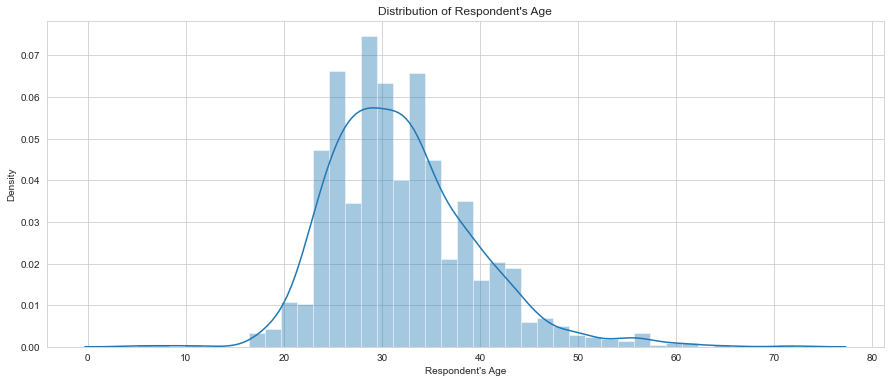

In [86]:
# Respondent's Age
plt.figure(figsize=(15, 6))

sns.distplot(df['Age'])

plt.xlabel("Respondent's Age")
plt.ylabel("Density")
plt.title("Distribution of Respondent's Age")
plt.show()

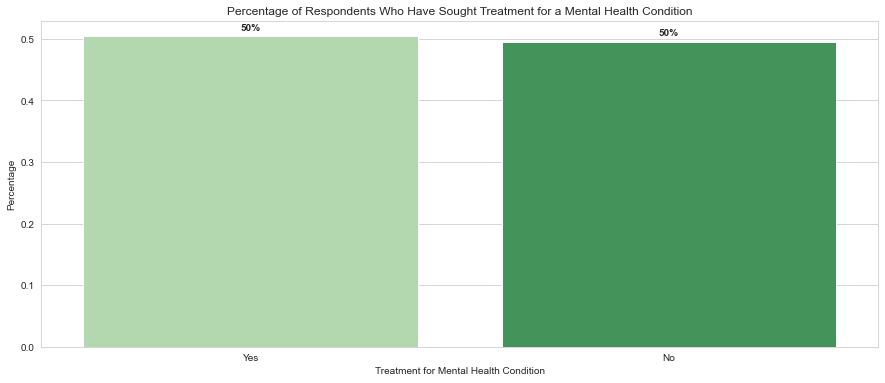

In [88]:
# percentage of respondents who have sought treatment

treatment_percentage = df['treatment'].value_counts(normalize=True).rename_axis('treatment').reset_index(name='Percentage')

# Set seaborn style
sns.set_style("whitegrid")

# Create a bar plot
plt.figure(figsize=(15, 6))
ax = sns.barplot(x='treatment', y='Percentage', data=treatment_percentage.head(10), palette='Greens')

# Annotate each bar with the percentage value
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center', fontweight='bold')

plt.xlabel("Treatment for Mental Health Condition")
plt.ylabel("Percentage")
plt.title("Percentage of Respondents Who Have Sought Treatment for a Mental Health Condition")
plt.show()


we see that the percentage of respondents who want to get treatment is exactly 50%. So let us dive deeper into the data

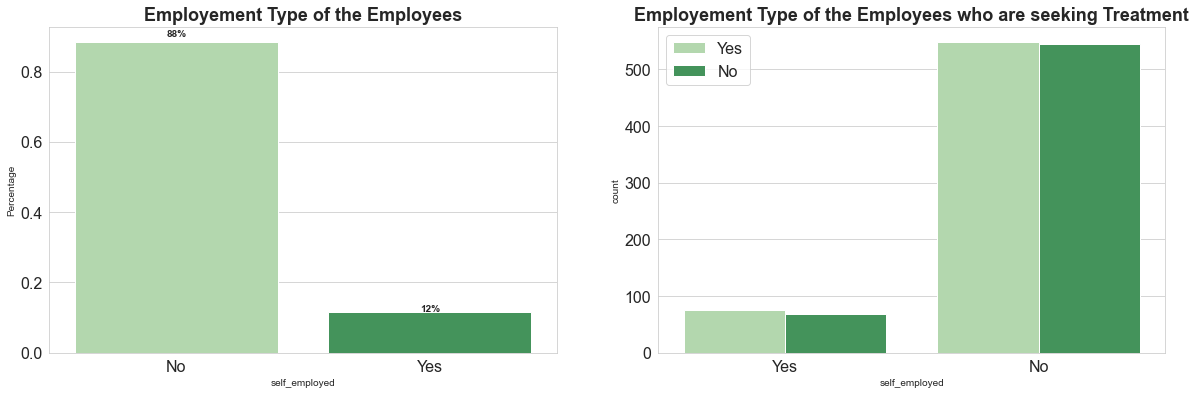

In [89]:
plt.figure(figsize = (20,6))
plt.subplot(1,2,1)
employee_percentage = df['self_employed'].value_counts(normalize = True).rename_axis('self_employed').reset_index(name = 'Percentage')
ax = sns.barplot(x = 'self_employed', y = 'Percentage', data = employee_percentage, palette = 'Greens')
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center', fontweight='bold')

plt.title('Employement Type of the Employees', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)


# Count of Employement Type of the Employees who are seeking Treatment

plt.subplot(1,2,2)
sns.countplot(df['self_employed'], hue = df['treatment'], palette = 'Greens')
plt.title('Employement Type of the Employees who are seeking Treatment',  fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)


plt.show()

 * First graph shows percentage of employment type (self- employment or working in tech companies) & second graph shows count of employees seeking treatment in both categories. 
 * We see that the number of people who are self employed are 12%. Most of the people who responded to the survey belonged to working class. We also see that though there is a vast difference between people who are self employed or not, the number of people who seek treatment in both the categories is more or less similar. Thus, we may conclude that whether a person is self employed or not, does not largely affect whether he may be seeking mental treatment or not.

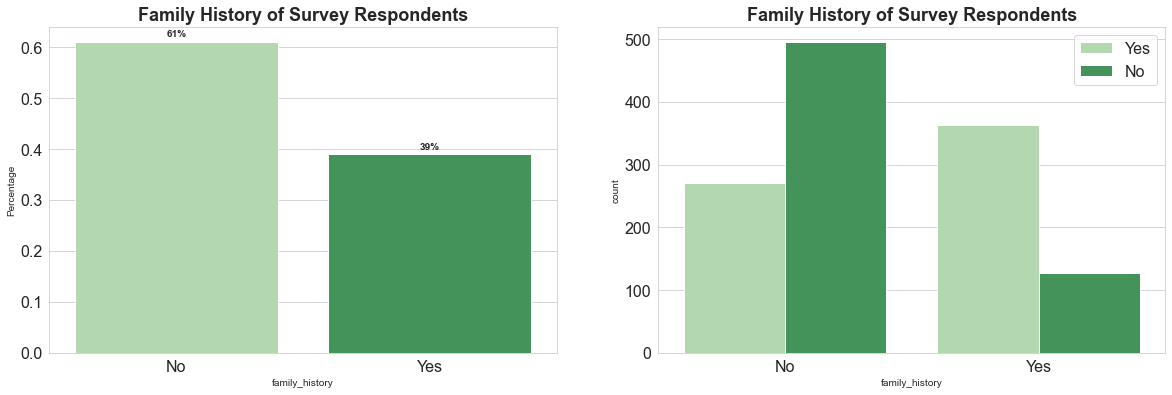

In [90]:
# Effect of having a family history of mental illnes

plt.figure(figsize = (20,6))
plt.subplot(1,2,1)
history_percentage = df['family_history'].value_counts(normalize = True).rename_axis('family_history').reset_index(name = 'Percentage')
ax = sns.barplot(x = 'family_history', y = 'Percentage', data = history_percentage, palette='Greens')
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center', fontweight='bold')

plt.title('Family History of Survey Respondents', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

# Count of the Employees that has family history and seeking Treatment

plt.subplot(1,2,2)
sns.countplot(df['family_history'], hue = df['treatment'], palette='Greens')
plt.title('Family History of Survey Respondents', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)
plt.show()

* Left side of the graph shows percentage of respondents having family history of mental illness & Right side graph shows the count of people seeking treatment in both categories. 
* The graph above illustrates that nearly 40% of respondents acknowledging a family history of mental illness, significantly want to be medically treated compared to those without such a history. This tendency is understandable, as individuals with a family history tend to prioritize mental health concerns. Family history stands out as a substantial risk factor for various mental health conditions. Therefore, it's crucial to factor in this element due to its influence on employee attitudes and actions.


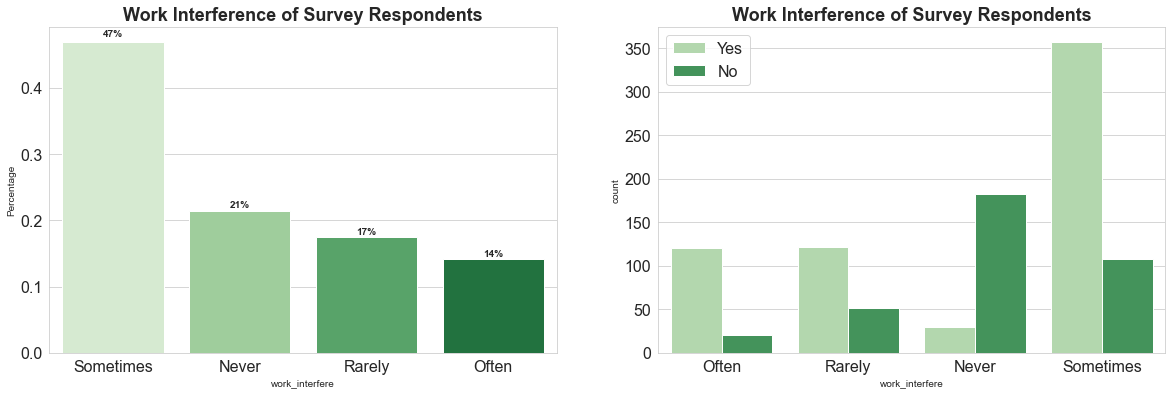

In [92]:
# Interference of mental health condition with work

plt.figure(figsize = (20,6))
plt.subplot(1,2,1)
work_percentage = df['work_interfere'].value_counts(normalize = True).rename_axis('work_interfere').reset_index(name = 'Percentage')
ax = sns.barplot(x = 'work_interfere', y = 'Percentage', data = work_percentage, palette='Greens')
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center', fontweight='bold')

plt.title('Work Interference of Survey Respondents', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

# Interference of mental health condition by seeking for treatment

plt.subplot(1,2,2)
sns.countplot(df['work_interfere'], hue = df['treatment'], palette = 'Greens')
plt.title('Work Interference of Survey Respondents', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

plt.show()

* The Left side graph shows percentage of respondents showing their feeling as sometimes, never, rarely & often. While, the second chart is showing the number of respondents seeking treatment in respective categories
* The above graph indicates that approximately 48% of individuals acknowledge that work sometimes affects their mental well-being. However, the term 'Sometimes' is rather ambiguous, often chosen by individuals facing mental health challenges but are too shy or hesitant to choose the extreme category. In the right side graph, we observe that those selecting 'Sometimes' exhibit the highest prevalence of actual mental health conditions. A similar trend is evident among respondents in the 'Often' category. Surprisingly, even among those stating that their mental health has 'Never' been compromised at work, a little group among them still want to get treatment before it becomes a job stress. Various factors may trigger this, such as mismatches between job demands and the worker's capabilities, resources, or needs.

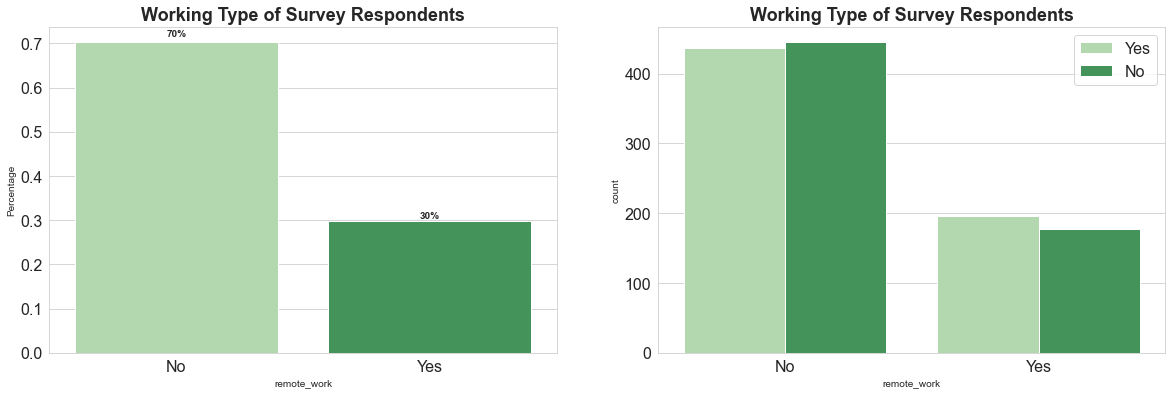

In [93]:
# Whether they work remotely at least 50% of the time 

plt.figure(figsize = (20,6))
plt.subplot(1,2,1)
remote_percentage = df['remote_work'].value_counts(normalize = True).rename_axis('remote_work').reset_index(name = 'Percentage')
ax = sns.barplot(x = 'remote_work', y = 'Percentage', data = remote_percentage, palette='Greens')
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center', fontweight='bold')

plt.title('Working Type of Survey Respondents', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)


# Whether they work remotely at least 50% of the time by seeking for treatment

plt.subplot(1,2,2)
sns.countplot(df['remote_work'], hue = df['treatment'], palette='Greens')
plt.title('Working Type of Survey Respondents', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

plt.show()

* Left side graph shows the percentage of respondent working remotely and not working remotely. the right side graph shows the number of respondents from each category seeking for treatment
* Around 70% of respondents don't work remotely, which means the biggest factor of mental health disorder came up triggered on the workplace. On the other side, it has slightly different between an employee that want to get treatment and don't want to get a treatment. 

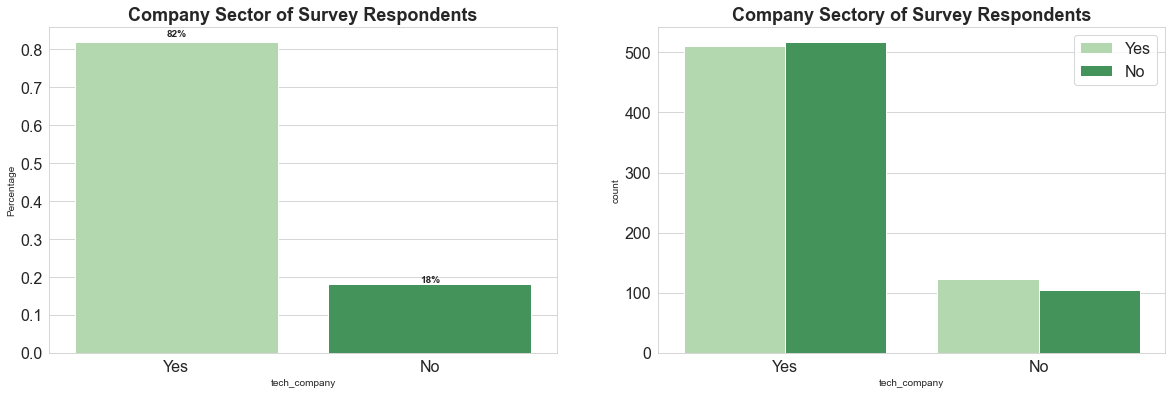

In [94]:
# Employees’ company/Organization sector

plt.figure(figsize = (20,6))
plt.subplot(1,2,1)
company_percentage = df['tech_company'].value_counts(normalize = True).rename_axis('tech_company').reset_index(name = 'Percentage')
ax = sns.barplot(x = 'tech_company', y = 'Percentage', data = company_percentage, palette='Greens')
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center', fontweight='bold')

plt.title('Company Sector of Survey Respondents', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

# Employees’ company/Organization type by seeking for treatment

plt.subplot(1,2,2)
sns.countplot(df['tech_company'], hue = df['treatment'], palette='Greens')
plt.title('Company Sectory of Survey Respondents', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

plt.show()

* Left side graph shows the percentage of respondent whose their employer primarily is a tech company/organization. the right side graph shows the number of respondents from each category seeking for treatment
* 18% of the companies belonginf to the non tech field. However, on the other, one may conclude that whether a person belongs to the tech field or not, mental health still becomes a big problem.

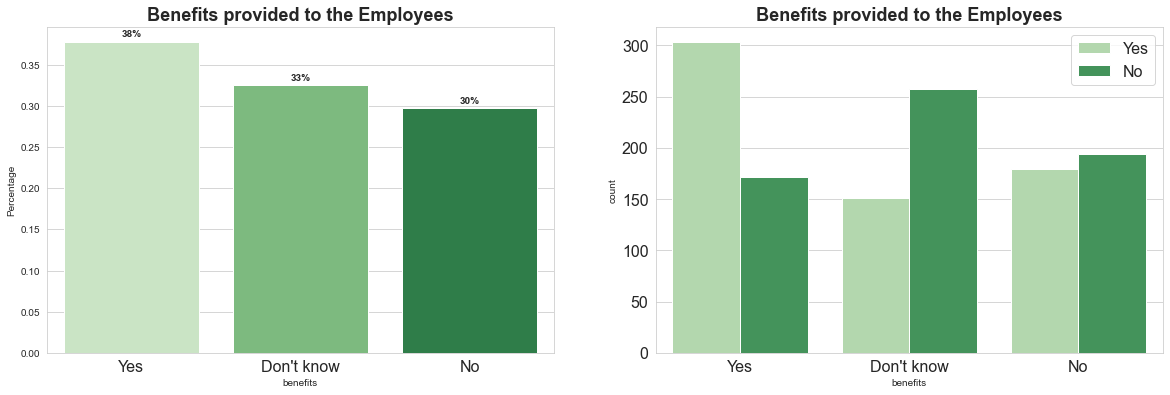

In [95]:
# Employees’ awareness of available mental health benefits

plt.figure(figsize = (20,6))
plt.subplot(1,2,1)
benefits_percentage = df['benefits'].value_counts(normalize = True).rename_axis('benefits').reset_index(name = 'Percentage')
ax = sns.barplot(x = 'benefits', y = 'Percentage', data = benefits_percentage, palette='Greens')
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center', fontweight='bold')

plt.title('Benefits provided to the Employees', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)


# Employees’ awareness of available mental health benefits by seeking for treatment

plt.subplot(1,2,2)
sns.countplot(df['benefits'], hue = df['treatment'], palette='Greens')
plt.title('Benefits provided to the Employees', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

plt.show()

* Left side graph shows the percentage of respondent’s response regarding the fact whether the employer provide mental health benefits or not. The right side graph shows the number of respondents who is seeking for treatment in each category.
* Based on the above chart, it's apparent that around 38% of respondents reported receiving mental health benefits from their employer, whereas a significant number (32%) indicated uncertainty regarding the provision of such benefits. Analysis of the second graph reveals that almost 63% of those affirming access to mental health benefits are actively seeking medical attention. Surprisingly, among individuals denying the presence of mental health benefits from their employer, approximately 45% express a desire to seek mental health treatment nonetheless.

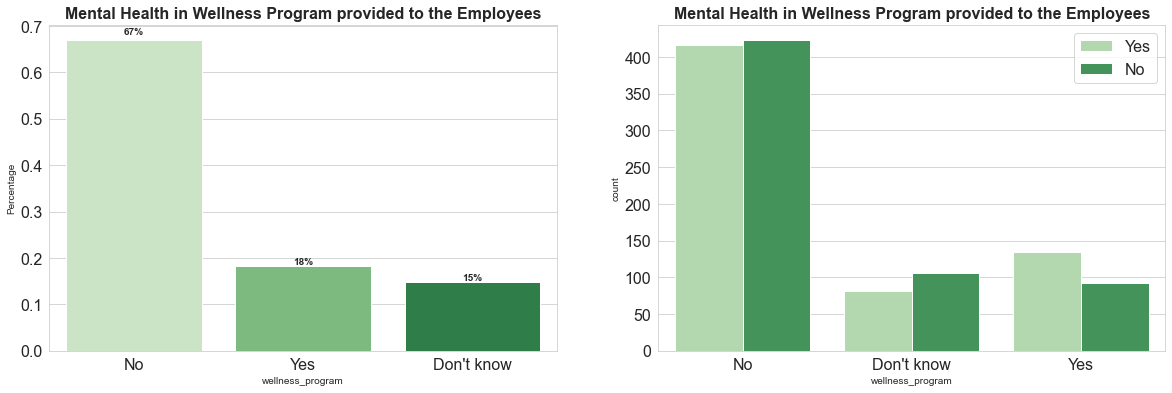

In [96]:
# Employees’ awareness of including mental health in employee wellness program

plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
wellness_percentage = df['wellness_program'].value_counts(normalize = True).rename_axis('wellness_program').reset_index(name = 'Percentage')
ax = sns.barplot(x = 'wellness_program', y = 'Percentage', data = wellness_percentage, palette='Greens')
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center', fontweight='bold')

plt.title('Mental Health in Wellness Program provided to the Employees', fontsize=16, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

# Employees’ awareness of including mental health in employee wellness program by seeking for treatment

plt.subplot(1,2,2)
sns.countplot(df['wellness_program'], hue = df['treatment'], palette='Greens')
plt.title('Mental Health in Wellness Program provided to the Employees', fontsize=16, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

plt.show()

* Left side graph shows the percentage of respondent’s response to the question whether mental health is included in the employee wellness program, while the right side graph shows the number of respondents in the three category seeking for treatment
* 19% of the repondents say YES about becoming a part of the employee wellness program and out of those 60% of employee want to get treatment.

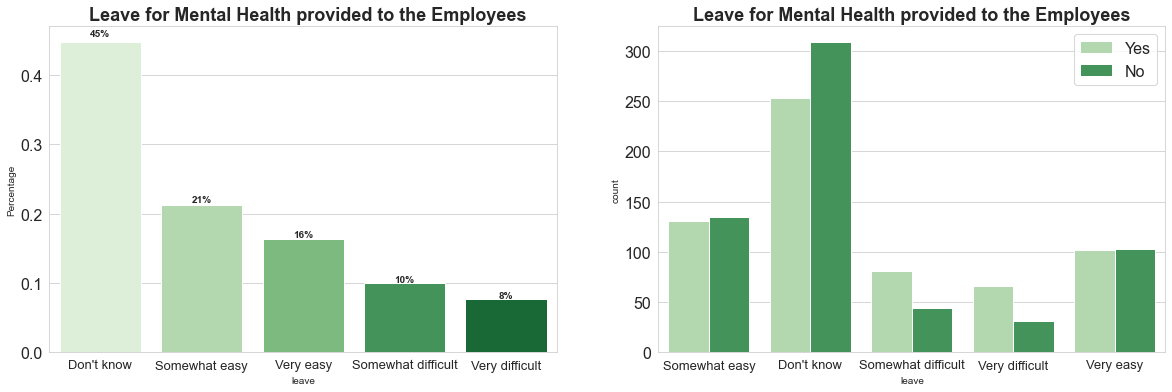

In [97]:
# Whether it is easy to take medical leave for a mental health condition 

plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
leave_percentage = df['leave'].value_counts(normalize = True).rename_axis('leave').reset_index(name = 'Percentage')
ax = sns.barplot(x = 'leave', y = 'Percentage', data = leave_percentage, palette='Greens')
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center', fontweight='bold')

plt.title('  Leave for Mental Health provided to the Employees', fontsize=18, fontweight='bold')
plt.xticks(fontsize=13)
plt.yticks(fontsize=16)

# Whether it is easy to take medical leave for a mental health condition by seeking for treatment

plt.subplot(1,2,2)
sns.countplot(df['leave'], hue = df['treatment'], palette='Greens')
plt.title('Leave for Mental Health provided to the Employees', fontsize=18, fontweight='bold')
plt.xticks(fontsize=13)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

plt.show()

* Left side graph shows the percentage of respondents’ response like “Don’t know”, “Somewhat easy”, “Very easy”, “Somewhat difficult” & “Very difficult”. the right side shows the number of respondents seeking treatment from the five categories.
* Approximately half of the respondents were unaware of the situation, yet surprisingly, about 45% of them sought assistance for their condition. Among those who found it very challenging to secure leave for mental health reasons, roughly 8% of the total, an overwhelming majority—75%—still sought help. Conversely, employees reporting ease in obtaining leave, whether somewhat or very easy, displayed a significant proportion, nearly 50%, seeking medical assistance.

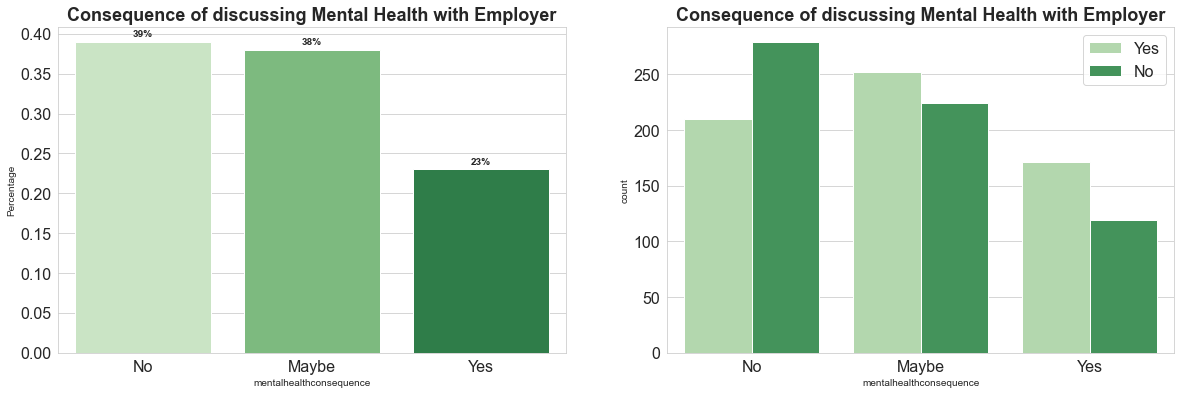

In [98]:
# Employees’ level of comfort to discuss mental health issues with your co- workers

plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
mental_percentage = df['mentalhealthconsequence'].value_counts(normalize = True).rename_axis('mentalhealthconsequence').reset_index(name = 'Percentage')
ax = sns.barplot(x = 'mentalhealthconsequence', y = 'Percentage', data = mental_percentage, palette='Greens')
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center', fontweight='bold')

plt.title('Consequence of discussing Mental Health with Employer', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

# Employees’ level of comfort to discuss mental health issues with your co- workers by seeking for treatment

plt.subplot(1,2,2)
sns.countplot(df['mentalhealthconsequence'], hue = df['treatment'], palette='Greens')
plt.title('Consequence of discussing Mental Health with Employer', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

plt.show()

* Approximately 40% of respondents each chose "Maybe" or "No" when asked about the negative consequences of discussing mental health issues with their employer, while around 23% responded with "Yes". This 23% represents a notable portion of individuals who believe that disclosing their mental health concerns could adversely affect their employer, possibly due to concerns about stigma, reduced productivity, impact on career advancement, or other preconceived notions.

* It's noteworthy that among those who responded "No", only about 40% sought help, whereas in both the "Maybe" and "Yes" categories, the proportion seeking assistance exceeded 50%.

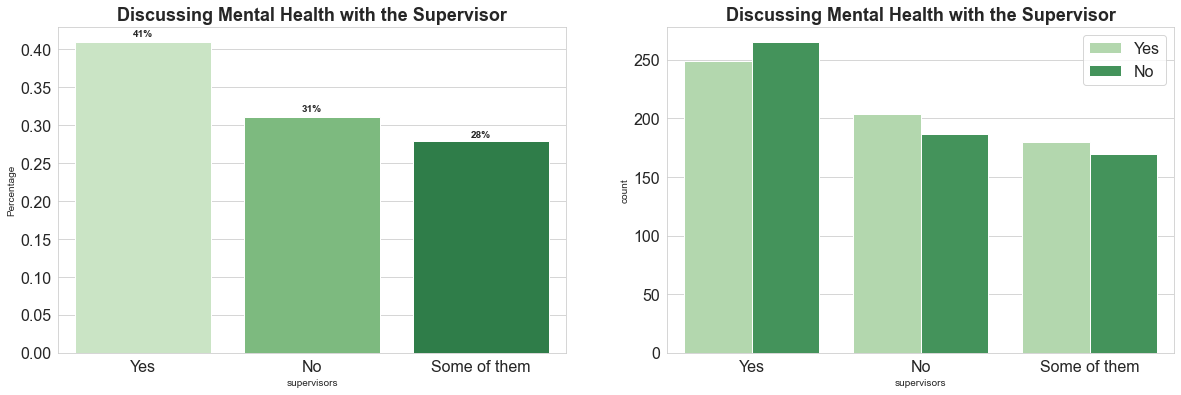

In [99]:
# Employees’ level of comfort to discuss mental health issues with supervisors

plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
supervisor_percentage = df['supervisors'].value_counts(normalize = True).rename_axis('supervisors').reset_index(name = 'Percentage')
ax = sns.barplot(x = 'supervisors', y = 'Percentage', data = supervisor_percentage, palette='Greens')
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center', fontweight='bold')

plt.title('Discussing Mental Health with the Supervisor', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

# Employees’ level of comfort to discuss mental health issues with supervisors by seeking for treatment

plt.subplot(1,2,2)
sns.countplot(df['supervisors'], hue = df['treatment'], palette='Greens')
plt.title('Discussing Mental Health with the Supervisor', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

plt.show()

About 40% of employees express a willingness to discuss their mental health concerns with their supervisors, potentially influencing their job performance. Additionally, the second graph illustrates that the proportion of employees seeking help for mental health issues remains consistent across all three categories examined.

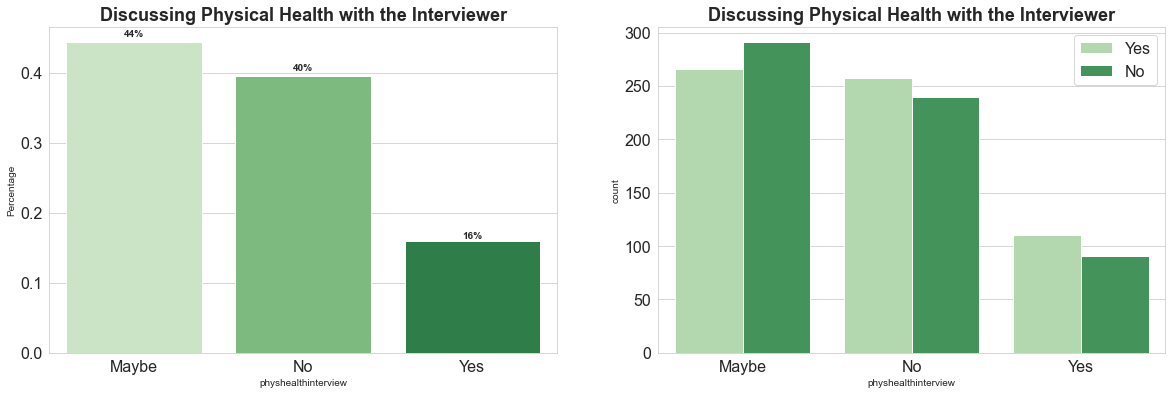

In [100]:
# Would you bring up a physical health issue with a potential employer in an interview?

plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
interview_percentage = df['physhealthinterview'].value_counts(normalize = True).rename_axis('physhealthinterview').reset_index(name = 'Percentage')
ax = sns.barplot(x = 'physhealthinterview', y = 'Percentage', data = interview_percentage, palette='Greens')
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center', fontweight='bold')

plt.title('Discussing Physical Health with the Interviewer', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

#  bringing up a physical health issue with a potential employer in an interview by seeking for treatment

plt.subplot(1,2,2)
sns.countplot(df['physhealthinterview'], hue = df['treatment'], palette='Greens')
plt.title('Discussing Physical Health with the Interviewer', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

plt.show()

Although most individuals are hesitant to discuss their physical health conditions with future employers, a notable 17% express no issue about doing so. However, approximately half of the respondents remain uncertain about the appropriateness of disclosing their condition during the hiring process.

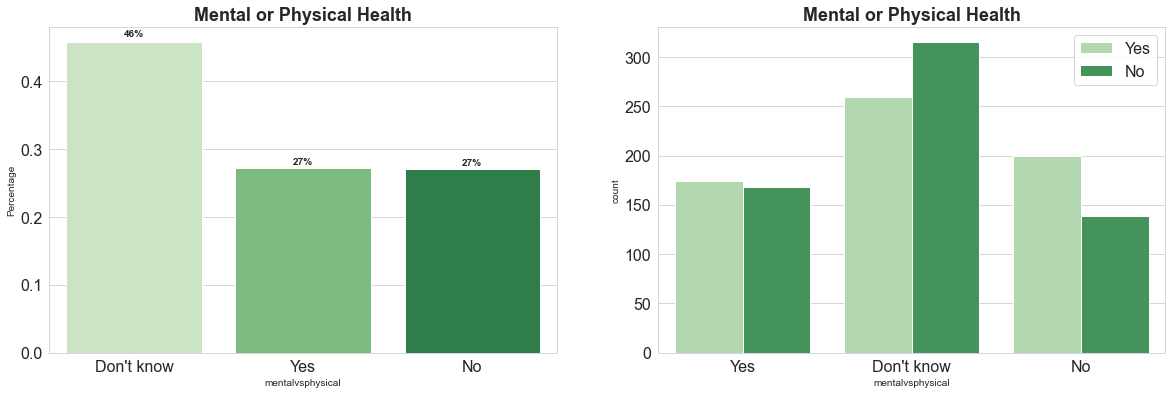

In [101]:
# Feeling whether employer takes mental health as seriously as physical health

plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
mentphy_percentage = df['mentalvsphysical'].value_counts(normalize = True).rename_axis('mentalvsphysical').reset_index(name = 'Percentage')
ax = sns.barplot(x = 'mentalvsphysical', y = 'Percentage', data = mentphy_percentage, palette='Greens')
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center', fontweight='bold')

plt.title('Mental or Physical Health', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

# Feeling whether employer takes mental health as seriously as physical health by seeking for treatment

plt.subplot(1,2,2)
sns.countplot(df['mentalvsphysical'], hue = df['treatment'], palette='Greens')
plt.title('Mental or Physical Health', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

plt.show()

Approximately 50% people said that they didn't know, with an equal number of people who answered Yes as well as No . Among those who answered Yes as well as No , over 50% sought medical assistance for mental health concerns, contrasting with the 'Don't know' group, where this trend was not observed.

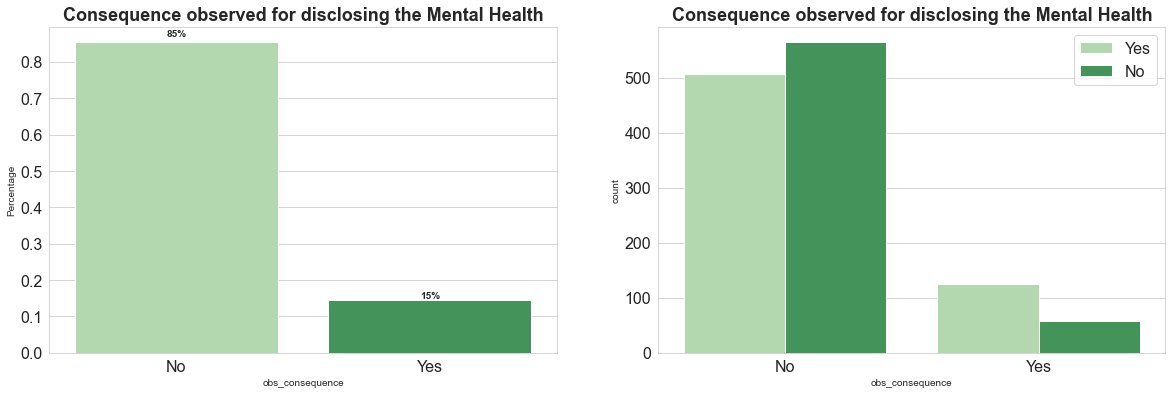

In [103]:
# Any negative consequences for co-workers with mental health conditions in workplace

plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
obs_percentage = df['obs_consequence'].value_counts(normalize = True).rename_axis('obs_consequence').reset_index(name = 'Percentage')
ax = sns.barplot(x = 'obs_consequence', y = 'Percentage', data = obs_percentage, palette='Greens')
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center', fontweight='bold')

plt.title('Consequence observed for disclosing the Mental Health', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)


# Any negative consequences for co-workers with mental health conditions in workplace by seeking for treatment

plt.subplot(1,2,2)
sns.countplot(df['obs_consequence'], hue = df['treatment'], palette='Greens')
    
plt.title('Consequence observed for disclosing the Mental Health', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)
           
plt.show()

Majority ( 85% ) of the people, answered No to this question. This is quite important to note that IT being an organised sector, follows strict guidelines of employee satisfaction etc. Thus, we didn't come across any major issue regarding the employer behavior as such!